In [ ]:
import darts
import pandas as pd
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
# import quandl
import matplotlib.pylab as plt

from statsmodels.tsa.stattools import coint, adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima.arima import auto_arima

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,LSTM
# import tensorflow.keras
# import tensorflow
# mlflow.tensorflow.autolog

# import mlflow
import sklearn.tree 
import sklearn
#import DecisionTreeRegressor

np.random.seed(0)
import time
start_time = time.time()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df_org = pd.read_csv('1 min range')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_org.head()

,symbol,start_time,opening_price,closing_price,highest_price,lowest_price,transaction_amount,transaction_volume
0,NKN-USDT,2022-05-06 23:59:00,0.1594,0.1594,0.1594,0.1594,0.000000,0.000000
1,NKN-USDT,2022-05-06 23:58:00,0.1594,0.1594,0.1594,0.1594,100.000000,15.940000
2,NKN-USDT,2022-05-06 23:57:00,0.1598,0.1602,0.1602,0.1598,7430.409825,1188.502088
3,NKN-USDT,2022-05-06 23:56:00,0.1601,0.1601,0.1601,0.1601,14.267333,2.284200
4,NKN-USDT,2022-05-06 23:55:00,0.1602,0.1602,0.1602,0.1602,0.000000,0.000000


In [ ]:
# pandas controls on how much data to see
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
df_org.symbol.unique()

array(['NKN-USDT', 'LOOM-BTC', 'JUP-ETH', ..., 'TRIBE-USDT', 'MLK-USDT',
       'USDT-UST'], dtype=object)

In [ ]:
df_org['start_time'].min()

'2022-05-05 12:35:00'

In [ ]:
df_org['start_time'].max()

'2022-05-06 23:59:00'

In [ ]:
df = df_org[df_org['symbol'] == "BTC-USDT"]

In [ ]:
df.head()

,Unnamed: 0,symbol,start_time,opening_price,closing_price,highest_price,lowest_price,transaction_amount,transaction_volume
270000,270000,BTC-USDT,2022-04-03 20:18:00,46262.1,46260.8,46273.9,46260.1,29.125969,1.347507e+06
270001,270001,BTC-USDT,2022-04-03 20:17:00,46248.9,46262.1,46273.6,46242.4,41.695592,1.928840e+06
270002,270002,BTC-USDT,2022-04-03 20:16:00,46281.0,46248.8,46281.0,46248.1,26.847173,1.241977e+06
270003,270003,BTC-USDT,2022-04-03 20:15:00,46331.4,46281.0,46337.9,46281.0,27.255850,1.262356e+06
270004,270004,BTC-USDT,2022-04-03 20:14:00,46300.0,46331.4,46341.1,46298.4,7.479338,3.464234e+05


In [ ]:
df['start_time'].min()

'2022-05-05 23:00:00'

In [ ]:
df['start_time'].max()

'2022-05-06 23:59:00'

LSTM 

In [ ]:
#df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['opening_price'] = pd.to_numeric(df['opening_price'], errors='coerce')
df['start_time']=pd.to_datetime(df['start_time']) 
df['year'] = df['start_time'].apply(lambda x: x.year)
df['quarter'] = df['start_time'].apply(lambda x: x.quarter)
df['month'] = df['start_time'].apply(lambda x: x.month)
df['day'] = df['start_time'].apply(lambda x: x.day)
df=df.loc[:,['start_time','opening_price', 'year','quarter','month','day']]
df.sort_values('start_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["start_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.opening_price.min())
print('The time series ends on: ', df.opening_price.max())

Number of rows and columns after removing missing values: (1500, 7)
The time series starts from:  35336.4
The time series ends on:  36544.9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
from scipy import stats
stat, p = stats.normaltest(df.opening_price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=36.860, p=0.000
Data does not look Gaussian (reject H0)


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.0 requir

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: -0.5087941552992903
Skewness of normal distribution: 0.1754882178925497


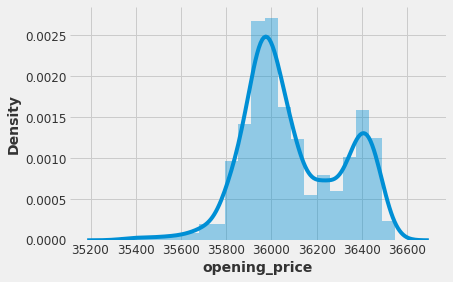

In [ ]:
import seaborn as sns

sns.distplot(df.opening_price);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.opening_price)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.opening_price)))

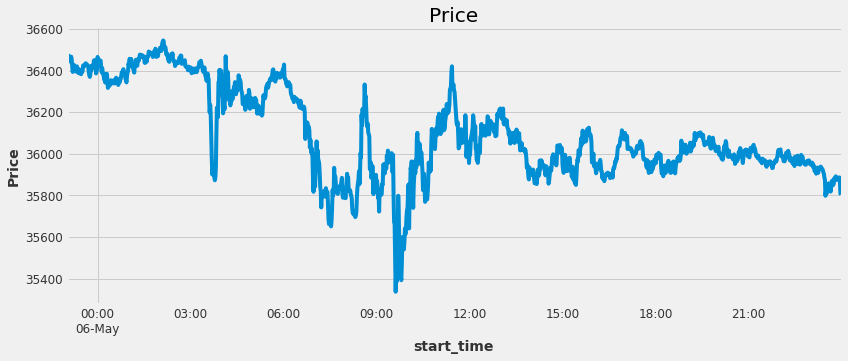

In [ ]:
import matplotlib.pyplot as plt
df1=df.loc[:,['start_time','opening_price']]
df1.set_index('start_time',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Price')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Price')
sns.despine(top=True)
plt.show();

,count,mean,std,min,25%,50%,75%,max
opening_price,1500.0,36093.656867,217.596724,35336.4,35946.2,36031.75,36277.875,36544.9


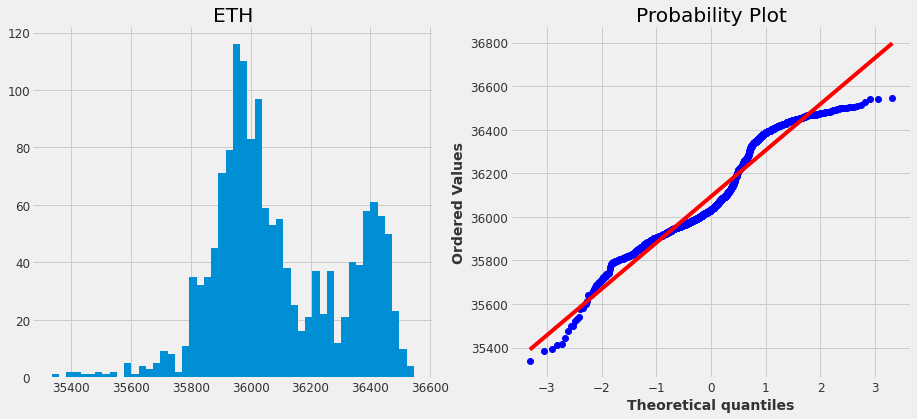

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['opening_price'].hist(bins=50)
plt.title('ETH')
plt.subplot(1,2,2)
stats.probplot(df['opening_price'], plot=plt);
df1.describe().T

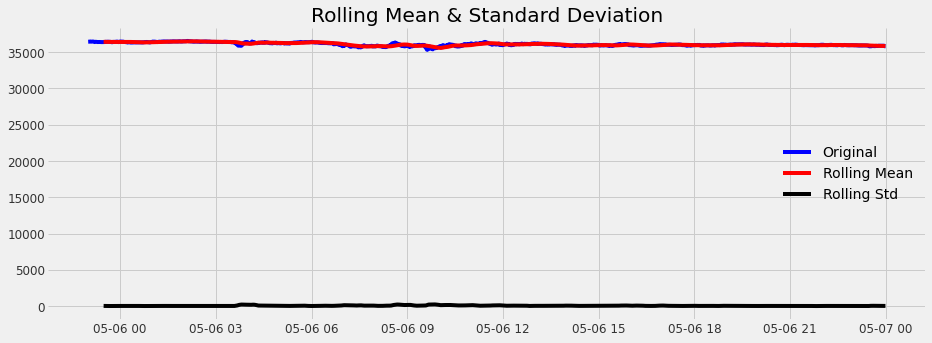

<Results of Dickey-Fuller Test>
Test Statistic                   -2.982556
p-value                           0.036556
#Lags Used                        7.000000
Number of Observations Used    1492.000000
Critical Value (1%)              -3.434740
Critical Value (5%)              -2.863479
Critical Value (10%)             -2.567802
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df1.opening_price.dropna())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

dataset = df.opening_price.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
17/17 [==============================] - 3s 40ms/step - loss: 0.1522 - val_loss: 0.0341
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.0025
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.0016
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 8.2114e-04
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 8.2479e-04
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 7.3342e-04
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 7.2120e-04
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 5.8272e-04
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 5.8357e-04
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 5

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 51.761735423906146
Train Root Mean Squared Error: 73.70907844017597
Test Mean Absolute Error: 17.15617429424548
Test Root Mean Squared Error: 22.476172899108832


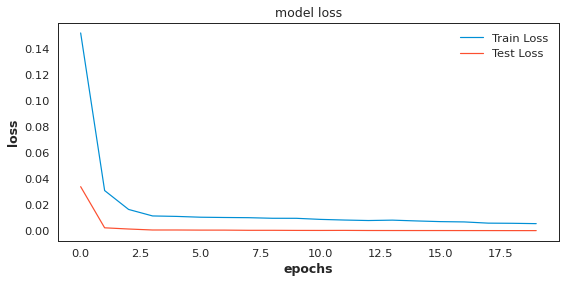

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

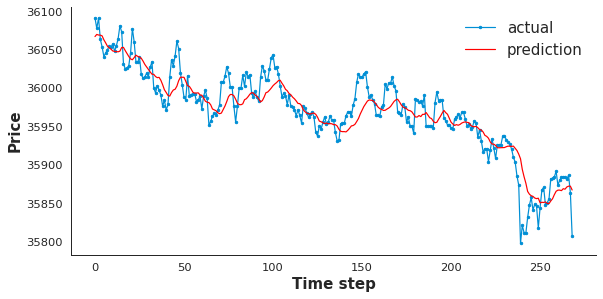

In [ ]:
aa=[x for x in range(400)]
plt.figure(figsize=(8,4))
plt.plot(Y_test[0][:350], marker='.', label="actual")
plt.plot(test_predict[:,0][:350], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();